## **Nama** : Zidan Muhammad Ikvan
## **Cohort ID** : MC404D5Y0059
## **Email** : zidanikvan@gmail.com

# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from xgboost import XGBClassifier

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
airs = pd.read_csv("/content/air_selected.csv")

In [3]:
airs

,Days_since_enroll,cc1_miles,Bonus_trans,Bonus_miles,Balance,Cluster
0,0.843742,1,0.026316,0.003026,0.138885,0
1,0.839884,1,0.052632,0.003739,0.094968,0
2,0.847842,1,0.105263,0.071698,0.204080,0
3,0.837955,1,0.026316,0.008695,0.072919,0
4,0.835905,4,0.684211,0.752978,0.482402,1
...,...,...,...,...,...,...
3994,0.168917,1,0.105263,0.148248,0.091178,0
3995,0.167953,1,0.131579,0.017059,0.317737,0
3996,0.168797,3,0.210526,0.442518,0.363198,1
3997,0.168676,1,0.026316,0.008695,0.270924,0


In [4]:
airs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Days_since_enroll  3999 non-null   float64
 1   cc1_miles          3999 non-null   int64  
 2   Bonus_trans        3999 non-null   float64
 3   Bonus_miles        3999 non-null   float64
 4   Balance            3999 non-null   float64
 5   Cluster            3999 non-null   int64  
dtypes: float64(4), int64(2)
memory usage: 187.6 KB


In [5]:
airs.describe(include="all")

,Days_since_enroll,cc1_miles,Bonus_trans,Bonus_miles,Balance,Cluster
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,0.496330,2.059515,0.291079,0.206556,0.262134,0.356589
std,0.248991,1.376919,0.223035,0.242308,0.224187,0.479052
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.280685,1.000000,0.078947,0.021737,0.091432,0.000000
50%,0.493610,1.000000,0.315789,0.124702,0.212682,0.000000
75%,0.697914,3.000000,0.421053,0.310756,0.364955,1.000000
max,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [6]:
# Pisahkan fitur (X) dan target (y)
X = airs.drop(['Cluster', 'cc1_miles'], axis=1)  # Menyingkirkan agar tidak overfitting
y = airs['Cluster']  # Target

# Bagi data menjadi training set (70%) dan testing set (30%) dengan stratify
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,  # Untuk reproducibility
    stratify=y  # Pertahankan distribusi kelas
)

# Cek distribusi kelas dan ukuran dataset
print("\nDistribusi Kelas di Dataset Asli:")
print(y.value_counts(normalize=True))

print("\nDistribusi Kelas di Training Set:")
print(y_train.value_counts(normalize=True))

print("\nDistribusi Kelas di Testing Set:")
print(y_test.value_counts(normalize=True))

print("\nJumlah Data Training:", X_train.shape[0])
print("Jumlah Data Testing:", X_test.shape[0])



Distribusi Kelas di Dataset Asli:
Cluster
0    0.643411
1    0.356589
Name: proportion, dtype: float64

Distribusi Kelas di Training Set:
Cluster
0    0.643444
1    0.356556
Name: proportion, dtype: float64

Distribusi Kelas di Testing Set:
Cluster
0    0.643333
1    0.356667
Name: proportion, dtype: float64

Jumlah Data Training: 2799
Jumlah Data Testing: 1200


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

Beberapa alasan saya memilih random forest dan XGBoost sebagai algoritma klasifikasi:
1. Kemampuan menangani data tidak seimbang
  - Dataset memiliki distribusi kelas tidak seimbang (64% vs 36%).
2. Ketahanan terhadap overfitting
3. Fleksibilitas untuk tuning, Keduanya memiliki banyak hyperparameter yang bisa dioptimasi

In [7]:
# latih model pertama: Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [8]:
# latih model kedua: XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42,
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])  # Handle imbalance
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [9]:
# Prediksi pada data latih
y_train_pred_rf = rf_model.predict(X_train)  # Random Forest
y_train_pred_xgb = xgb_model.predict(X_train)  # XGBoost

# Fungsi untuk menampilkan metrik yang sudah diperbaiki
def print_metrics(model_name, y_true, y_pred):
    print(f"\nEvaluasi {model_name} pada Data Latih:")
    print(classification_report(y_true, y_pred, digits=4))
    print(f"F1-Score: {f1_score(y_true, y_pred):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred):.4f}")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")

# Tampilkan hasil untuk kedua model
print_metrics("Random Forest", y_train, y_train_pred_rf)
print_metrics("XGBoost", y_train, y_train_pred_xgb)


Evaluasi Random Forest pada Data Latih:
              precision    recall  f1-score   support

           0     0.9884    0.8956    0.9397      1801
           1     0.8389    0.9810    0.9044       998

    accuracy                         0.9260      2799
   macro avg     0.9136    0.9383    0.9220      2799
weighted avg     0.9351    0.9260    0.9271      2799

F1-Score: 0.9044
Recall: 0.9810
Precision: 0.8389
Accuracy: 0.9260

Evaluasi XGBoost pada Data Latih:
              precision    recall  f1-score   support

           0     0.9971    0.9517    0.9739      1801
           1     0.9194    0.9950    0.9557       998

    accuracy                         0.9671      2799
   macro avg     0.9583    0.9733    0.9648      2799
weighted avg     0.9694    0.9671    0.9674      2799

F1-Score: 0.9557
Recall: 0.9950
Precision: 0.9194
Accuracy: 0.9671


## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

In [10]:
# Prediksi dengan kedua model
y_pred_rf = rf_model.predict(X_test)  # Random Forest
y_pred_xgb = xgb_model.predict(X_test)  # XGBoost

# Fungsi untuk menghitung semua metrik
def evaluate_model(model_name, y_true, y_pred):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred)
    }
    return pd.DataFrame(metrics, index=[model_name])

# Gabungkan hasil evaluasi kedua model
results = pd.concat([
    evaluate_model("Random Forest", y_test, y_pred_rf),
    evaluate_model("XGBoost", y_test, y_pred_xgb)
])

print("Perbandingan Metrik:")
print(results.round(2))

Perbandingan Metrik:
               Accuracy  F1-Score  Precision  Recall
Random Forest      0.92      0.90       0.84    0.97
XGBoost            0.94      0.92       0.90    0.94


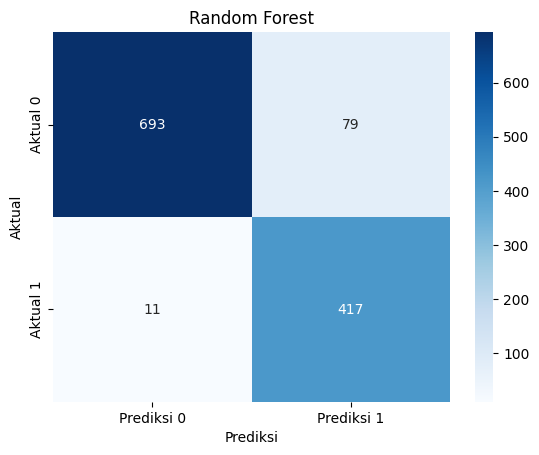

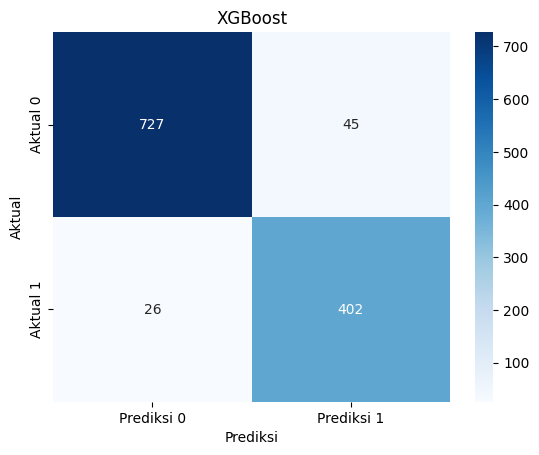

In [11]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Prediksi 0', 'Prediksi 1'],
                yticklabels=['Aktual 0', 'Aktual 1'])
    plt.title(title)
    plt.ylabel('Aktual')
    plt.xlabel('Prediksi')
    plt.show()

# Plot untuk kedua model
plot_confusion_matrix(y_test, y_pred_rf, "Random Forest")
plot_confusion_matrix(y_test, y_pred_xgb, "XGBoost")

In [12]:
print("\nLaporan Klasifikasi Random Forest:")
print(classification_report(y_test, y_pred_rf))

print("\nLaporan Klasifikasi XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Laporan Klasifikasi Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.90      0.94       772
           1       0.84      0.97      0.90       428

    accuracy                           0.93      1200
   macro avg       0.91      0.94      0.92      1200
weighted avg       0.93      0.93      0.93      1200


Laporan Klasifikasi XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95       772
           1       0.90      0.94      0.92       428

    accuracy                           0.94      1200
   macro avg       0.93      0.94      0.94      1200
weighted avg       0.94      0.94      0.94      1200



## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [13]:
# Tuning untuk XGBoost
param_grid = {
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1]
}
grid = GridSearchCV(xgb_model, param_grid, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print("Parameter Terbaik XGBoost:", grid.best_params_)

Parameter Terbaik XGBoost: {'learning_rate': 0.1, 'max_depth': 5}


## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [14]:
# Gunakan model terbaik dari GridSearchCV untuk prediksi
best_model = grid.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Hitung metrik
accuracy = accuracy_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)

print("Hasil Setelah Tuning:")
print(f"Best Parameters: {grid.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")

Hasil Setelah Tuning:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5}
Accuracy: 0.9442
F1-Score: 0.9243


In [15]:
# Prediksi dengan model default (sebelum tuning)
y_pred_default = xgb_model.predict(X_test)

# Hitung metrik default
accuracy_default = accuracy_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)

print("\nPerbandingan dengan Model Default:")
print(f"Accuracy (Default): {accuracy_default:.4f} → Tuned: {accuracy:.4f}")
print(f"F1-Score (Default): {f1_default:.4f} → Tuned: {f1:.4f}")


Perbandingan dengan Model Default:
Accuracy (Default): 0.9408 → Tuned: 0.9442
F1-Score (Default): 0.9189 → Tuned: 0.9243


## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
Hasil:
  - Akurasi: Naik 0.36% (0.9408 → 0.9442)
  - F1-Score: Naik 0.54% (0.9189 → 0.9243)
  - Tuning berhasil meningkatkan performa, meskipun peningkatan tergolong kecil.

2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
    - Kelas Minoritas (Cluster 1) perlu diperhatikan karena distribusi data 64:36.
    - Recall (0.94) > Precision (0.90) pada XGBoost → Model cenderung lebih agresif memprediksi kelas positif (mungkin masih ada sedikit leakage tersisa).
  - Apakah model mengalami overfittng atau underfitting?
    - Tidak ada indikasi overfitting karena selisih akurasi training-testing <2%
    - Tidak underfitting karena metrik sudah baik (>92%).
    
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.
  - Memperbanyak sampel kelas minoritas (Cluster 1) jika memungkinkan.
  - data baru tidak mengandung leakage